In [338]:
library(Seurat)
library(tidyverse)
library(CellChat)
library(patchwork)
library(repr)
library(RColorBrewer)
library(scales)
library(paletteer)
library(readxl)
options(stringsAsFactors = FALSE)

library(corrplot)
library(ggpubr)


options(future.globals.maxSize = 5e9)

# load data

In [149]:
scdata=readRDS("/data2/xiangwei/projects/zhaolian/10polyIntegrate/results/sctAnnotationSeuObj")
scdata

An object of class Seurat 
50442 features across 45620 samples within 2 assays 
Active assay: SCT (22704 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: RNA
 8 dimensional reductions calculated: pca, umap.unintegrated, integrated.cca, integrated.rpca, integrated.harmony, umap.cca, umap.rpca, umap.harmony

In [151]:
scdata=subset(scdata,main %in% c("Epithelial"))

In [ ]:
scdata$main=as.character(scdata$main)
scdata$fine=as.character(scdata$fine)
sampleID=names(table(scdata$sampleID))
sampleID
cellnum=table(scdata$fine,scdata$sampleID)%>%as.data.frame.array()
cellnum
write.table(cellnum,"results/cellnum.csv",sep = ",")

In [165]:
table(scdata$sampleID)


  148_T1   148_T3 142_T5-4   132_T1   142_T2    18_T3    18_T4    17_T4 
    1076     1252      689     1769     1668     2563     1440     3218 
  151_T4      WT1      WT2 
    3595     1266     1018 

# set color

In [155]:
mainColor=paletteer_d("basetheme::clean")[c(1:8)]
fineColor=paletteer_d("ggsci::default_ucscgb")

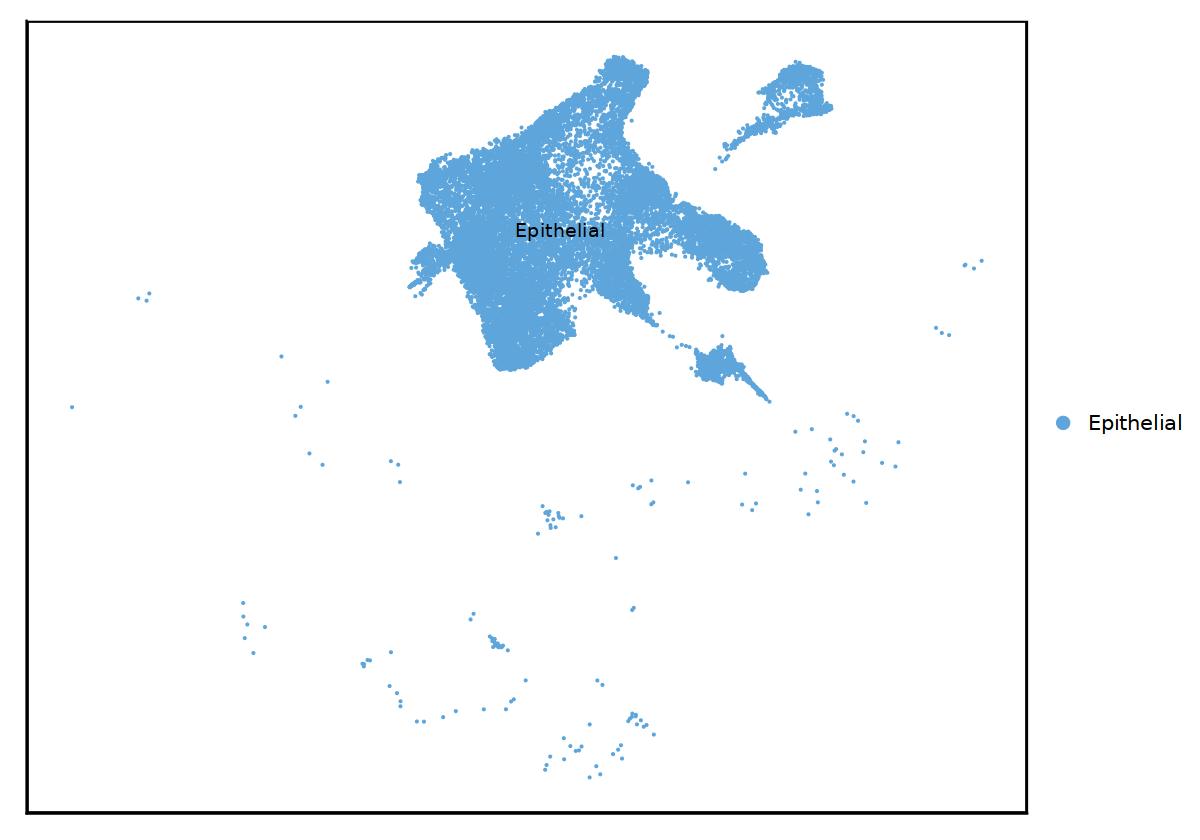

In [156]:
options(repr.plot.width=10,repr.plot.height=7)
umapmain=DimPlot(scdata,reduction = "umap.harmony",
  group.by = c( "main"), label = T,order=F,pt.size=0.1,cols=mainColor)+
labs(x = NULL, y = NULL)+
theme(axis.text.y = element_blank(), axis.ticks.y = element_blank(), 
      axis.text.x = element_blank(), axis.ticks.x = element_blank())+
theme(plot.title = element_blank())+
theme(panel.border = element_rect(fill=NA,color="black", size=1, linetype="solid"))
umapmain

# downsample

In [169]:
metadata=scdata@meta.data%>%rownames_to_column(var="cellID")%>%select(cellID,sampleID)

In [170]:
df=metadata%>%group_by(sampleID)

In [171]:
Res=map_dfr(1:50, ~ slice_sample(df, n = 689), .id = "replicate")

In [200]:
dim(Res)
head(Res)
table(Res$replicate)

[1] 378950      3

replicate,cellID,sampleID
<chr>,<chr>,<fct>
1,148T1_TGAAAGAAGTACTTGC-1,148_T1
1,148T1_ATCCACCAGATCTGAA-1,148_T1
1,148T1_TGGCTGGGTCCCTACT-1,148_T1
1,148T1_ACAGCTAAGACTTGAA-1,148_T1
1,148T1_TACTTACCAATACGCT-1,148_T1
1,148T1_CTACCCATCACCACCT-1,148_T1



   1   10   11   12   13   14   15   16   17   18   19    2   20   21   22   23 
7579 7579 7579 7579 7579 7579 7579 7579 7579 7579 7579 7579 7579 7579 7579 7579 
  24   25   26   27   28   29    3   30   31   32   33   34   35   36   37   38 
7579 7579 7579 7579 7579 7579 7579 7579 7579 7579 7579 7579 7579 7579 7579 7579 
  39    4   40   41   42   43   44   45   46   47   48   49    5   50    6    7 
7579 7579 7579 7579 7579 7579 7579 7579 7579 7579 7579 7579 7579 7579 7579 7579 
   8    9 
7579 7579 

In [ ]:
#689*11=7579

In [173]:
ds1=Res%>%filter(replicate==15)
ds2=Res%>%filter(replicate==4)

In [174]:
table(ds1$sampleID)
table(ds2$sampleID)


  148_T1   148_T3 142_T5-4   132_T1   142_T2    18_T3    18_T4    17_T4 
     689      689      689      689      689      689      689      689 
  151_T4      WT1      WT2 
     689      689      689 


  148_T1   148_T3 142_T5-4   132_T1   142_T2    18_T3    18_T4    17_T4 
     689      689      689      689      689      689      689      689 
  151_T4      WT1      WT2 
     689      689      689 

In [175]:
length(intersect(ds1$cellID,ds2$cellID))

[1] 3710

In [164]:
scdata

An object of class Seurat 
50442 features across 19554 samples within 2 assays 
Active assay: SCT (22704 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: RNA
 8 dimensional reductions calculated: pca, umap.unintegrated, integrated.cca, integrated.rpca, integrated.harmony, umap.cca, umap.rpca, umap.harmony

In [166]:
saveRDS(scdata,"epidata")

In [201]:
write.table(Res,"downsampleRes.csv",sep = ",")

In [211]:
getwd()

[1] "/data2/xiangwei/projects/zhaolian/16cellchat/cellchatEpidownsample/ds50"

# load data

In [340]:
files = fs::dir_ls("/data2/xiangwei/projects/zhaolian/16cellchat/cellchatEpidownsample/summary/LRnum/", recurse = TRUE, glob = "*.csv")

In [341]:
length(files)
files[1]

[1] 50

/data2/xiangwei/projects/zhaolian/16cellchat/cellchatEpidownsample/summary/LRnum/ds10_NpLRtable.csv

In [342]:
df=map_dfr(set_names(files),read.table,sep=",",header=T,.id="rep")

In [343]:
dim(df)
head(df)

[1] 450   7

,rep,sampleID,Np,X1.Np,stage,totalLRnum,totalLRweight
,<chr>,<chr>,<dbl>,<dbl>,<chr>,<int>,<dbl>
1,/data2/xiangwei/projects/zhaolian/16cellchat/cellchatEpidownsample/summary/LRnum/ds10_NpLRtable.csv,148_T1,1.604244,0.6233466,late,788,6.442608
2,/data2/xiangwei/projects/zhaolian/16cellchat/cellchatEpidownsample/summary/LRnum/ds10_NpLRtable.csv,148_T3,2.670790,0.3744210,late,805,3.531140
3,/data2/xiangwei/projects/zhaolian/16cellchat/cellchatEpidownsample/summary/LRnum/ds10_NpLRtable.csv,142_T5-4,2.802020,0.3568854,late,739,3.937039
4,/data2/xiangwei/projects/zhaolian/16cellchat/cellchatEpidownsample/summary/LRnum/ds10_NpLRtable.csv,132_T1,4.075022,0.2453974,early,1018,6.110266
5,/data2/xiangwei/projects/zhaolian/16cellchat/cellchatEpidownsample/summary/LRnum/ds10_NpLRtable.csv,142_T2,5.653750,0.1768737,early,841,5.106521
6,/data2/xiangwei/projects/zhaolian/16cellchat/cellchatEpidownsample/summary/LRnum/ds10_NpLRtable.csv,18_T3,6.088663,0.1642397,early,923,4.330189


In [344]:
rep=df$rep

In [345]:
str_length("/data2/xiangwei/projects/zhaolian/16cellchat/cellchatEpidownsample/summary/LRnum/")

[1] 81

In [346]:
str_length("_NpLRtable.csv")

[1] 14

In [347]:
repID=rep%>%str_sub(start = 82,end=-15)
table(repID)
repID[1:3]

repID
 ds1 ds10 ds11 ds12 ds13 ds14 ds15 ds16 ds17 ds18 ds19  ds2 ds20 ds21 ds22 ds23 
   9    9    9    9    9    9    9    9    9    9    9    9    9    9    9    9 
ds24 ds25 ds26 ds27 ds28 ds29  ds3 ds30 ds31 ds32 ds33 ds34 ds35 ds36 ds37 ds38 
   9    9    9    9    9    9    9    9    9    9    9    9    9    9    9    9 
ds39  ds4 ds40 ds41 ds42 ds43 ds44 ds45 ds46 ds47 ds48 ds49  ds5 ds50  ds6  ds7 
   9    9    9    9    9    9    9    9    9    9    9    9    9    9    9    9 
 ds8  ds9 
   9    9 

[1] "ds10" "ds10" "ds10"

In [348]:
df$rep=repID
head(df)

,rep,sampleID,Np,X1.Np,stage,totalLRnum,totalLRweight
,<chr>,<chr>,<dbl>,<dbl>,<chr>,<int>,<dbl>
1,ds10,148_T1,1.604244,0.6233466,late,788,6.442608
2,ds10,148_T3,2.670790,0.3744210,late,805,3.531140
3,ds10,142_T5-4,2.802020,0.3568854,late,739,3.937039
4,ds10,132_T1,4.075022,0.2453974,early,1018,6.110266
5,ds10,142_T2,5.653750,0.1768737,early,841,5.106521
6,ds10,18_T3,6.088663,0.1642397,early,923,4.330189


In [274]:
#write.table(df,"results/dsResPopF.csv",sep = ",")

In [287]:
#write.table(df,"results/dsResPopT.csv",sep = ",")

# summary

In [1]:
df=read.table("results/dsResPopT.csv",sep = ",",header = T)

In [2]:
head(df)

,rep,sampleID,Np,X1.Np,stage,totalLRnum,totalLRweight
,<chr>,<chr>,<dbl>,<dbl>,<chr>,<int>,<dbl>
1,ds10,148_T1,1.604244,0.6233466,late,788,0.07464109
2,ds10,148_T3,2.670790,0.3744210,late,805,0.04703875
3,ds10,142_T5-4,2.802020,0.3568854,late,739,0.07741018
4,ds10,132_T1,4.075022,0.2453974,early,1018,0.06088494
5,ds10,142_T2,5.653750,0.1768737,early,841,0.05545748
6,ds10,18_T3,6.088663,0.1642397,early,923,0.05551648


In [3]:
table(df$sampleID)


  132_T1   142_T2 142_T5-4   148_T1   148_T3   151_T4    17_T4    18_T3 
      50       50       50       50       50       50       50       50 
   18_T4 
      50 

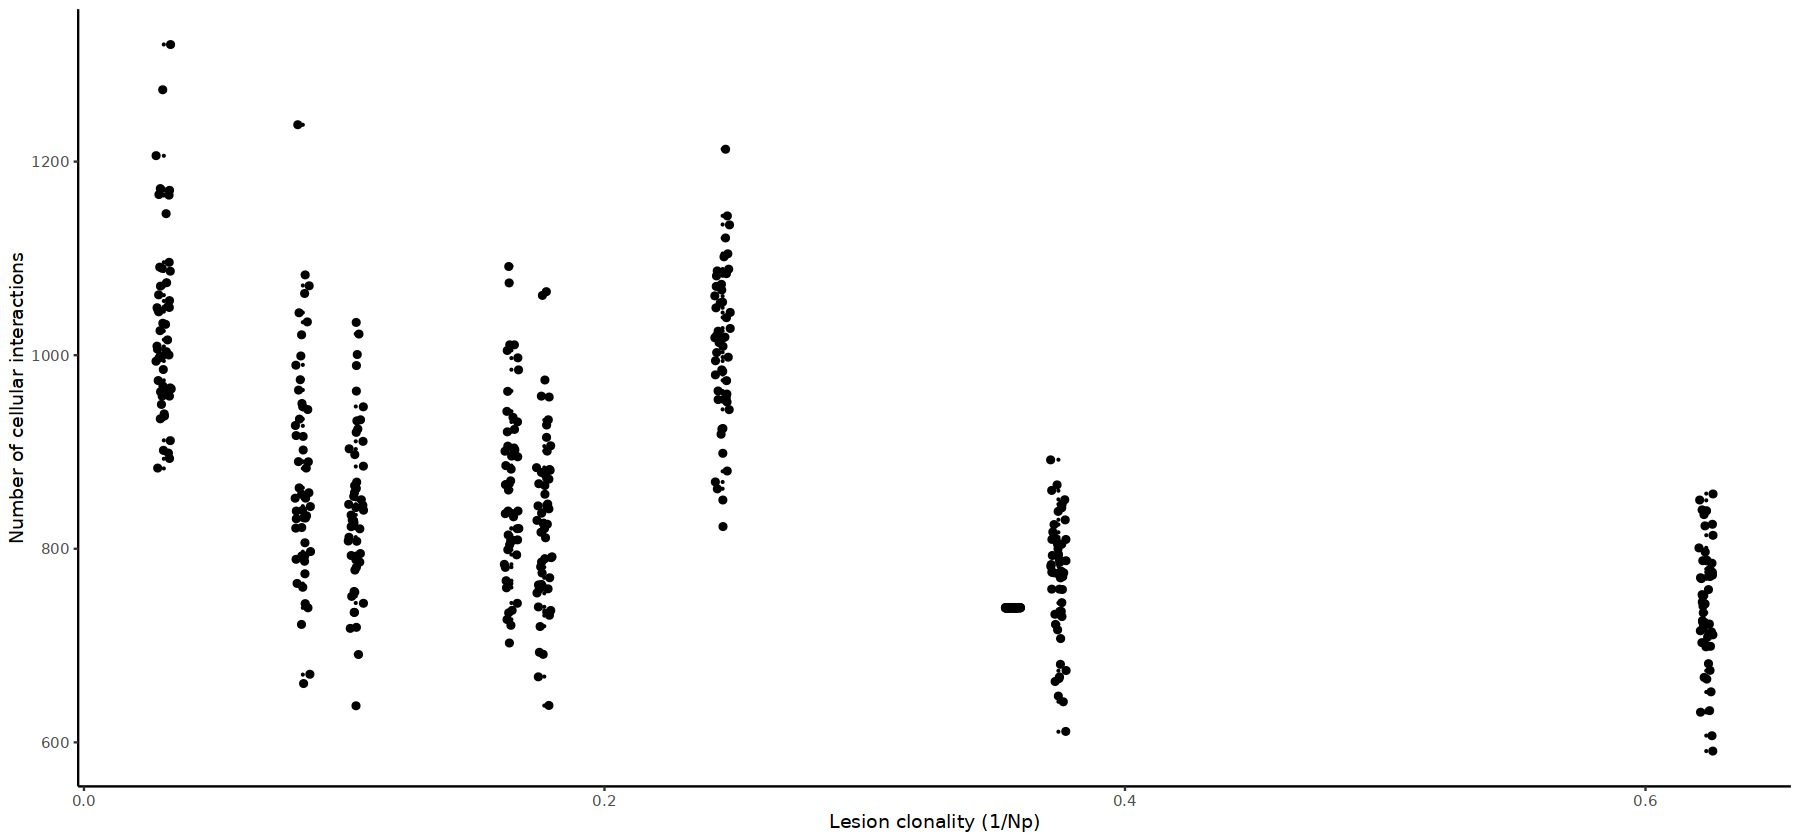

In [350]:
dsplot=ggplot(df,aes(x=X1.Np,y=totalLRnum))+geom_point(size=0.1)+geom_jitter(width = 0.003)+
ylab("Number of cellular interactions")+
xlab("Lesion clonality (1/Np)")+theme_classic()
dsplot

In [332]:
ggsave(dsplot,filename = "results/plot/dsplot.pdf",width = 8,height = 5)

In [357]:
dfmean=df%>%group_by(X1.Np)%>%summarise(n=n(),mean=mean(totalLRnum),median=median(totalLRnum))

In [358]:
dfmean

X1.Np,n,mean,median
<dbl>,<int>,<dbl>,<dbl>
0.03068519,50,1030.98,1012.5
0.08409053,50,879.16,854.0
0.10443470,50,840.24,837.5
0.16423968,50,862.20,850.0
0.17687375,50,827.84,825.5
0.24539743,50,1009.82,1018.0
0.35688537,50,739.00,739.0
0.37442101,50,767.34,776.0
0.62334657,50,741.02,742.0


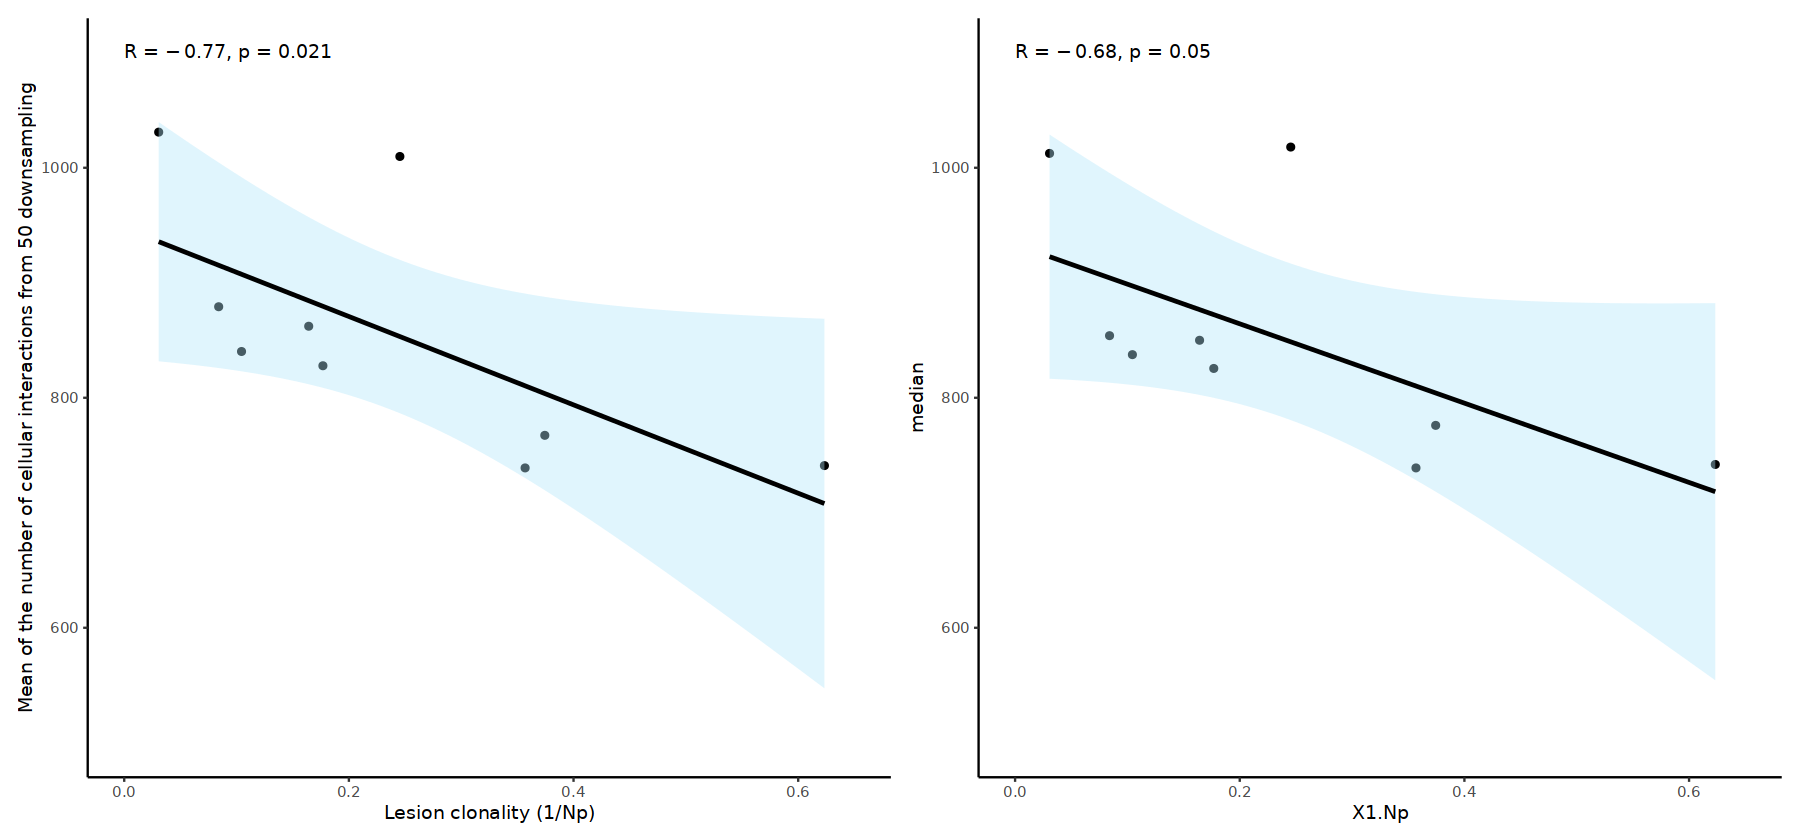

In [353]:
options(repr.plot.width=15)
plotMean=ggplot(dfmean,aes(x=`X1.Np`,y=mean))+geom_point()+theme_classic()+
geom_smooth(method = "lm", formula = y ~ x, color = "black", fill = "#b2e7fa",alpha = 0.4)+
stat_cor(method = "spearman",label.x = 0,label.y = 1100)+xlim(c(0,0.65))+ylim(c(500,1100))+
ylab("Mean of the number of cellular interactions from 50 downsampling")+
xlab("Lesion clonality (1/Np)")
plotMedian=ggplot(dfmean,aes(x=`X1.Np`,y=median))+geom_point()+theme_classic()+
geom_smooth(method = "lm", formula = y ~ x, color = "black", fill = "#b2e7fa",alpha = 0.4)+
stat_cor(method = "spearman",label.x = 0,label.y = 1100)+xlim(c(0,0.65))+ylim(c(500,1100))
plotMean|plotMedian

In [315]:
ggsave(plotMean,filename = "results/plot/plotMean.pdf",width = 6,height = 5)